<a href="https://colab.research.google.com/github/pedrorotta/PythonIntermedio2022/blob/main/Lec6_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema 1

In [ ]:
#Para la data de breast cancer, realice reescaling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler as MMS
import matplotlib.pyplot as plt
import seaborn as sns

df_breast = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase5/breast-cancer.csv")
df_breast.head()

X = np.array(df_breast.drop(columns = ['id','diagnosis']))
y = np.array(df_breast['diagnosis'])
print(np.shape(X))
x = X[:,0] # Separo el valor que voy a escalar
x = np.reshape(x,(len(x),1)) #Siempre (n,1) para vectores y (n,m) para matrices. 
#print(x[:5])
#print(np.shape(x))
scaler1 = MMS(feature_range = (0,1))
x_scal = scaler1.fit_transform(x)
#

(569, 30)


In [ ]:

df_breast = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase5/breast-cancer.csv")
display(df_breast.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


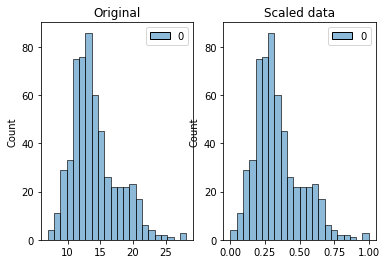

In [ ]:
fig,ax = plt.subplots(1,2)
sns.histplot(x,ax=ax[0])
ax[0].set_title('Original')
sns.histplot(x_scal,ax=ax[1])
ax[1].set_title('Scaled data')
plt.show()

## Problema 2

In [ ]:
# Para la data de breast cancer, realice scalarization

from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler().fit(x)
x_standarized = scaler2.transform(x)

In [ ]:
print(x_standarized[:5,0])

[ 1.09706398  1.82982061  1.57988811 -0.76890929  1.75029663]


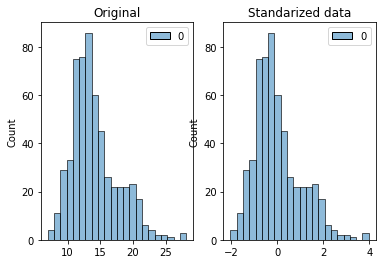

In [ ]:
fig,ax = plt.subplots(1,2)
sns.histplot(x,ax=ax[0])
ax[0].set_title('Original')
sns.histplot(x_standarized,ax=ax[1])
ax[1].set_title('Standarized data')
plt.show()

In [ ]:
boxcos = stats.boxcox(x1d)[1]
print(boxcos)

-0.4629944288740602


[17.99 20.57 19.69 11.42 20.29]
(569,)
(569,)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


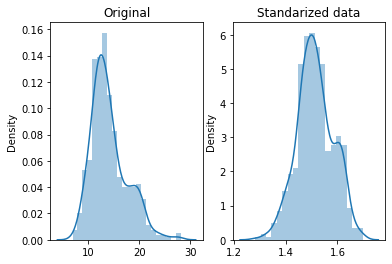

In [ ]:
#Estandarización completa (Normalización gaussiana)
from scipy import stats
x1d = np.reshape(x,(len(x),))
print(x1d[:5])
print(np.shape(x1d))
x_normalizadogaussiano = stats.boxcox(x1d)[0]
print(np.shape(x_normalizadogaussiano))
#x_normalizadogaussianor = np.reshape(x_normalizadogaussiano,(len(x),1)) #Lo hago para poder graficar

##Grafica
fig,ax = plt.subplots(1,2)
sns.distplot(x1d,ax=ax[0])
ax[0].set_title('Original')
sns.distplot(x_normalizadogaussiano,ax=ax[1])
ax[1].set_title('Standarized data')
plt.show()


## Problema 3

In [ ]:
# Para la data de movies realice normalization
import pandas as pd
df_movies = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase5/movies.csv")
display(df_movies.head())

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [ ]:
#Crear un subconjunto con las 2 columnas : Domestic Sales e International Sales
import numpy as np
Dom_salesarr = df_movies['Domestic Sales (in $)']
Int_salesarr = df_movies['International Sales (in $)']
X_features= np.c_[Dom_salesarr,Int_salesarr]

print(X_features[:5,:])


[[ 936662225 1132859475]
 [ 858373000 1939128328]
 [ 760507625 2086738578]
 [ 700426566  647171407]
 [ 678815482 1369544272]]


In [ ]:
x1 = np.array(df_movies[['Domestic Sales (in $)','International Sales (in $)']])
print(x1[:5,:])

[[ 936662225 1132859475]
 [ 858373000 1939128328]
 [ 760507625 2086738578]
 [ 700426566  647171407]
 [ 678815482 1369544272]]


In [ ]:
from sklearn.preprocessing import Normalizer
normalizador1 = Normalizer()
print(normalizador1)
normalizador1.fit(X_features)
X_features_normalizados = normalizador1.transform(X_features)
print(X_features_normalizados[:5,:])

Normalizer()
[[0.63721369 0.77068717]
 [0.40477483 0.91441639]
 [0.34241646 0.93954828]
 [0.73447734 0.67863321]
 [0.44409332 0.89598054]]


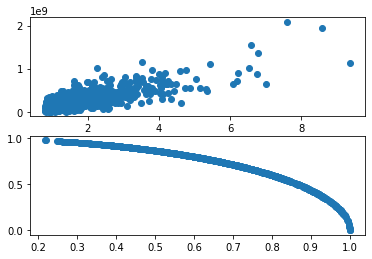

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,1)
ax[0].scatter(X_features[:,0],X_features[:,1])
ax[1].scatter(X_features_normalizados[:,0],X_features_normalizados[:,1])
plt.show()

## Problema 4

In [ ]:
# Para la data de wine realice binarization 

## Problema 5

In [ ]:
# Para la data de hotencoding realice hot encoding
df_empleos = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase5/hotencoding.csv")
display(df_empleos.head())

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [ ]:
df_empleos['Job Title'].describe()

count               4344
unique                26
top       Data Scientist
freq                1844
Name: Job Title, dtype: object

In [ ]:
df_empleos['Job Title'].value_counts()

Data Scientist                              1844
Data Analyst                                 990
Data Engineer                                805
Machine Learning Engineer                    568
Data Science                                  43
Senior Data Scientist                         39
Junior Data Scientist                         18
Senior Machine Learning Engineer               9
Lead Data Scientist                            6
Machine Learning Scientist                     2
Machine Learning Developer                     2
Machine Learning Data Associate II             2
Software Engineer - Machine Learning           2
Machine Learning Consultant                    2
Machine Learning Data Associate                1
Data Science Associate                         1
Associate Machine Learning Engineer            1
Data Science Consultant                        1
Machine Learning Data Analyst                  1
Data Science Manager                           1
Machine Learning Sof

### Dummies

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas import get_dummies

hot_encoding = get_dummies(df_empleos['Job Title']) #Usando get_dummies

In [ ]:
hot_encoding.head()

,Associate Machine Learning Engineer,Data Analyst,Data Engineer,Data Science,Data Science Associate,Data Science Consultant,Data Science Lead,Data Science Manager,Data Scientist,Data Scientist - Trainee,Junior Data Scientist,Lead Data Scientist,Machine Learning Associate,Machine Learning Consultant,Machine Learning Data Analyst,Machine Learning Data Associate,Machine Learning Data Associate I,Machine Learning Data Associate II,Machine Learning Developer,Machine Learning Engineer,Machine Learning Engineer/Data Scientist,Machine Learning Scientist,Machine Learning Software Engineer,Senior Data Scientist,Senior Machine Learning Engineer,Software Engineer - Machine Learning
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Label Encoder

In [ ]:
labelencoder = LabelEncoder()
encodex = labelencoder.fit_transform(np.array(df_empleos['Job Title']))

In [ ]:
encodex[0:10]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [ ]:
#convertir a dataframe + #usar value_count(df)

### Usando el método OneHotEncoder

In [ ]:
array_empleos = np.array(df_empleos['Job Title'])
array_empleos = np.reshape(array_empleos,(len(df_empleos),1))

In [ ]:
onehot1 = OneHotEncoder(handle_unknown = 'ignore')
onehot1.fit(array_empleos) # primera linea que habría que agregar (I)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
hot_encoding_x = onehot1.transform(array_empleos).toarray() #Faltó el toarray() (II)

In [ ]:
print(hot_encoding_x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


## Problema 6

In [ ]:
"""
Para la data: 
[[5,np.nan,8],[9,3,5],[8,6,4],
 [np.nan,5,2],[2,3,9],[np.nan,8,7],
 [1,np.nan,5]])
Gener sus valores
"""

In [ ]:
#Para wine genere binarization

In [ ]:
# Para ramen rating genere binarization

In [ ]:
#compare normalización y standarización para breast cancer

In [ ]:
#Realice labeling en breast cancer

In [ ]:
# Realice normalización para la data de app

In [ ]:
# Realice hot encoding para la data de melbornhouse